# How to Style Matplotlib Plots and Charts
## Customize your Pandas plots with off-the shelf style sheets - or design your own

![](styles_files/6styles.png)

Web sites, publications and news sources all have their own styles. Take a look at the financial data published by, say, the BBC or The NewYork Times. Or polling data on Nate Silver's FiveThirtyEight web site. They each have a clear and consistent look.

We are going to look at how we can achieve something similar with our Pandas charts and plots. First, by using the built-in styles that are available to us and then by looking at how we can create our own customizations.

The default style renders a line graph like the image, below. It's a clean-looking image but there are several more built-in styles if you prefer something different.

![](styles_files/default.png)

The styles available a stored in a list in the *Mathplotlib* library. First, we need to import the library and, we'll import *numpy* at the same time as we will use this shortly.

In [55]:
import matplotlib.pyplot as plt
import numpy as np

The styles are in ``plt.style.available`` - the code below prints a neat list of the styles.

In [56]:
styles = plt.style.available
for style in styles:
    print(style)

Solarize_Light2
_classic_test_patch
_mpl-gallery
_mpl-gallery-nogrid
bmh
classic
dark_background
fast
fivethirtyeight
ggplot
grayscale
petroff10
seaborn-v0_8
seaborn-v0_8-bright
seaborn-v0_8-colorblind
seaborn-v0_8-dark
seaborn-v0_8-dark-palette
seaborn-v0_8-darkgrid
seaborn-v0_8-deep
seaborn-v0_8-muted
seaborn-v0_8-notebook
seaborn-v0_8-paper
seaborn-v0_8-pastel
seaborn-v0_8-poster
seaborn-v0_8-talk
seaborn-v0_8-ticks
seaborn-v0_8-white
seaborn-v0_8-whitegrid
tableau-colorblind10


Above is the list from my installation which is the version 3.10.0 of Matplotlib.

Many of the styles have been created for the plotting package Seaborn but you can use them with any plotting library that is based on mathplotlib.

Other styles are emulations of other plotting systems or web sites. The ``ggplot`` style is based on the the *ggplot2* library that is commonly used in the R language.

Below there is a function that can be used to explore the different styles. It is a function that generates some pseudo-random data and then plots a line graph in Matplotlib. We can pass a style as a parameter to it.

Two Numpy sequences are created for the two axes ``x`` and ``y``. ``x`` is created using ``np.linspace(0, 10, 100)``, which generates 100 evenly spaced values between 0 and 10.
``y`` is created by taking the sine of ``x`` values and adding some random noise to it using ``np.random.normal(0, 0.1, 100)``, which generates 100 random values from a normal distribution with a mean of 0 and a standard deviation of 0.1.

The result example use shows a plot with the ``seaborn-v0_8`` style.

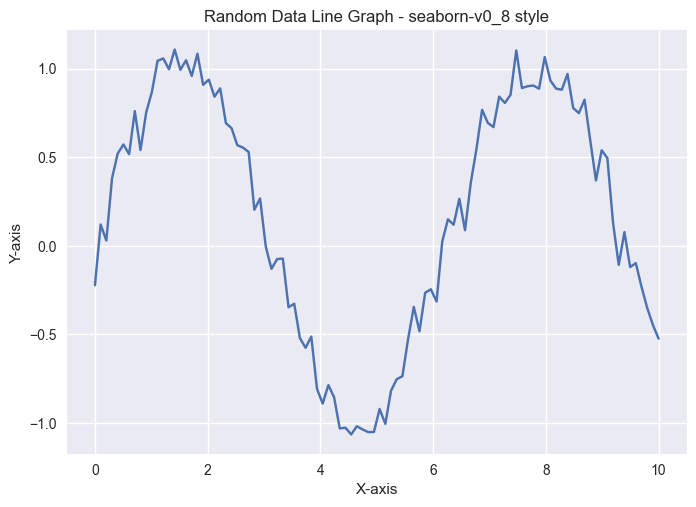

In [57]:
def plot_with_style(style):
    # Create random data
    x = np.linspace(0, 10, 100)
    y = np.sin(x) + np.random.normal(0, 0.1, 100)

    # Set the style
    plt.style.use(style)

    # Plot the data
    plt.plot(x, y)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(f'Random Data Line Graph - {style} style')
    plt.show()

# Example usage
plot_with_style('seaborn-v0_8')

Here what the ``ggplot`` style looks like.

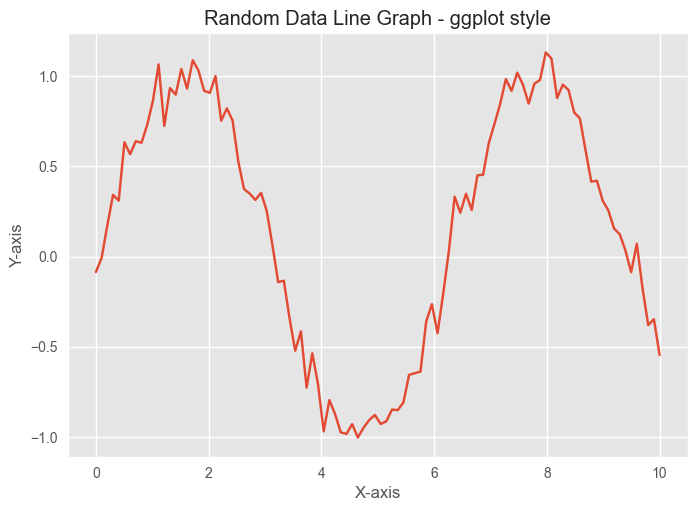

In [58]:
plot_with_style('ggplot')

How about a dar background?

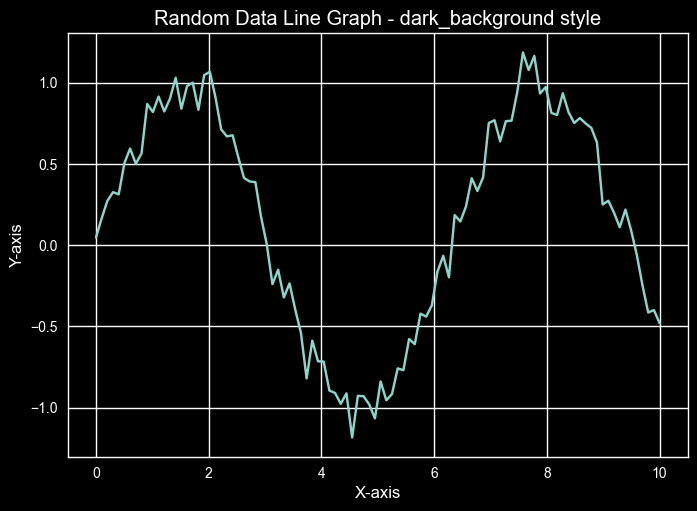

In [59]:
plot_with_style('dark_background')

So that's how we change to one of the built-in styles and one of these might be suitable for your purposes. Or maybe you want to be a little more adventurous.

### Changing individual attributes

The attributes for Matplotlib graphs are stored in a dictionary called rcParams. You can change individual attributes by setting values in that dictionary. So, if you wanted to change the font size from it default value of 10, to something smaller, you could do this:

In [60]:
plt.rcParams['font.size'] = 8

Any subsequent plot that you make will now have font size of 8.
You can easily find all of the rcParams simply by printing them.

In [61]:
print(plt.rcParams)

_internal.classic_mode: False
agg.path.chunksize: 0
animation.bitrate: -1
animation.codec: h264
animation.convert_args: ['-layers', 'OptimizePlus']
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: True
axes.edgecolor: white
axes.facecolor: black
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: True
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: white
axes.labelpad: 4.0
axes.labelsize: large
axes.labelweight: normal
axes.linewidth: 1.0
axes.prop_cycle: cycler('color', ['#8dd3c7', '#feffb3', '#bfbbd9', '#fa8174', '#81b1d2', '#fdb462', '#b3de69', '#bc82bd', '#ccebc4', '#ffed6f'])
axes.spines.bottom: True
axes.spines.left: True
axes.spines.r

There are an awful lot of them so i won't list thenm here. The purpose of some parameters is a little obscure but below is a some code that uses a few where the purpose is fairly clear.


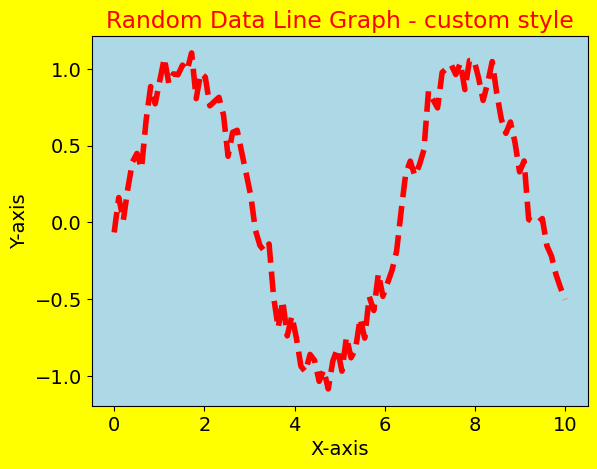

In [68]:
import matplotlib as mpl
from cycler import cycler

# Reset everything to the default style
mpl.style.use('default')

# Set custom rcParams for the plot
mpl.rcParams['lines.linewidth'] = 4         # Set line width to 4
mpl.rcParams['lines.linestyle'] = '--'      # Set line style to dashed
 # Set color cycle for lines, the first is red and that is what will be used
mpl.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'y']) 
mpl.rcParams['figure.facecolor'] = 'yellow' # Set figure background color to yellow
mpl.rcParams['axes.facecolor'] = 'lightblue'# Set axes background color to light blue
mpl.rcParams['font.size'] = 14              # Set font size to 14
mpl.rcParams['text.color'] = 'red'          # Set text color to red

# Generate random data
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.1, 100)

# Plot the data with custom style
plt.plot(x, y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Random Data Line Graph - custom style')
plt.show()

You can see what changing the each of the parameters has done in the resulting chart - the meaning of these parameters is fairly clear but the comments tell you exactly what they are doing. The color cycle is slightly more complicated - you don't just set a single colour but a sequence of them that will be cycled through. Here, of course, there is only one plot so only one colour is used. (I am not, by the way suggesting that you adopt this particular color scheme!)

### Create your own stylesheet

You don't have to specify the parameters you want in every program you write. You can create your own stylesheet and use that instead of one of the built-in ones.
All you have to do is create a text file with the rcParams set the way you want them and then use that as your stylesheet in a similar way to the built-in ones, for example:

```
mpl.style.use('path-to-my-style-sheet')
```

And you don't have to specify all of the rcParams only the ones that you want to change.

Here is an example of a simple style sheet that I have saved in the file *example.mlpstyle*. It sets the colours to various shades of blue.

```
lines.linewidth: 2          # Set line width to 2
figure.facecolor: eff3ff    # Set figure background color
axes.facecolor: bdd7e7      # Set axes background color
font.size: 14               # Set font size to 14
text.color: 08519c          # Set text color
axes.labelcolor: 08519c     # set the axes labels
```

the code below uses this style but it first sets the *default* style. This has the effect that the new style sheet changes the values specified in that sheet but leaves all of the others as they are. 

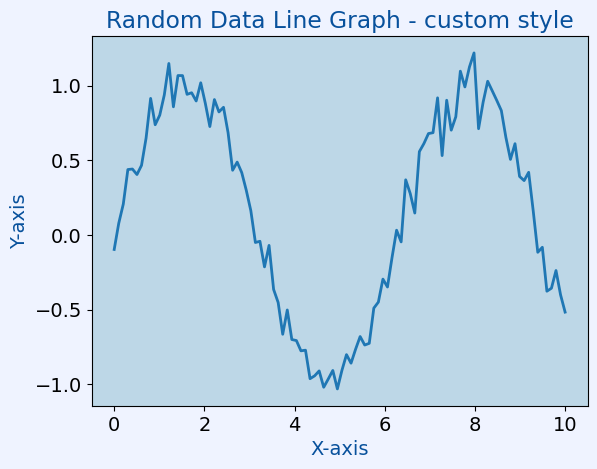

In [88]:
# Reset everything to the default style
mpl.style.use('default')

# Now apply the new stylesheet
mpl.style.use('example.mplstyle')

# Generate random data
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.1, 100)

# Plot the data with custom style
plt.plot(x, y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Random Data Line Graph - custom style')
plt.show()